# Machine Learning 11: Linear Regression Model

## 🔍 What is Linear Regression?
Linear Regression is one of the simplest and most widely used supervised learning algorithms in machine learning. 
It is used to predict a **continuous target variable** based on one or more input features
## 📈 Objective
To model the relationship between:

- Dependent variable (y): What we want to predict.
- Independent variable(s) (x): Features or inputs.

## 🧠 Types of Linear Regression

## 1. Simple Linear Regression

Predicts the target using **one feature**.

### Equation:
$$
y = mx + c
$$

## 2. Multiple Linear Regression

Predicts the target using **multiple features**.

### Equation:
$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n
$$

## 🔢 Key Terms

- **y** = dependend variable
- **x** = independent variables
- **m** = Slope/gradien/coefficient
- **c** = Intercept

## ✅ Assumptions of Linear Regression

1. **Linearity**: Linear relationship between independent and dependent variables.  
2. **Independence**: Observations are independent of each other.  
3. **Homoscedasticity**: Constant variance of errors.  
4. **No multicollinearity**: Features should not be highly correlated.  
5. **Normal distribution of errors**: Residuals should follow a normal distribution.



In [1]:
# 0) Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# 1) Load data
df = pd.read_csv("Placement.csv")        # ensure file in working dir
# quick peek
print(df.head())

   cgpa  package
0  6.89     3.26
1  5.12     1.98
2  7.82     3.25
3  7.42     3.67
4  6.94     3.57


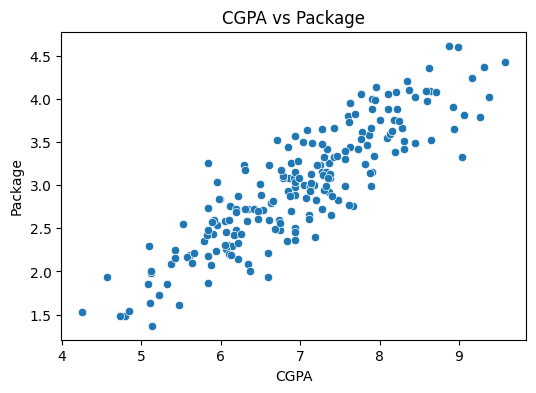

In [3]:
# 2) Basic scatter plot
plt.figure(figsize=(6,4))
sns.scatterplot(x="cgpa", y="package", data=df)
plt.title("CGPA vs Package")
plt.xlabel("CGPA")
plt.ylabel("Package")
plt.show()

In [4]:
# 3) Prepare features and target
X = df[["cgpa"]]         # keep as 2D (DataFrame)
y = df["package"]        # 1D Series (preferred for sklearn metrics)

In [5]:
# 4) Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [6]:
# 5) Fit Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [7]:
print("Coefficient (m):", lr.coef_[0])
print("Intercept (c):", lr.intercept_)

Coefficient (m): 0.5742564727019197
Intercept (c): -1.0270069374542108


In [8]:
# 6) Predictions (use same shape as training features)
y_pred_test = lr.predict(X_test)     # predictions for test set
y_pred_all = lr.predict(X)           # for plotting regression line over full dataset

In [9]:
# 7) Evaluation metrics (test set)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

In [10]:
print(f"Test MSE  = {mse:.4f}")
print(f"Test RMSE = {rmse:.4f}")
print(f"Test MAE  = {mae:.4f}")
print(f"Test R2   = {r2*100:.2f}%")   # as percentage like original

Test MSE  = 0.0842
Test RMSE = 0.2901
Test MAE  = 0.2315
Test R2   = 77.31%


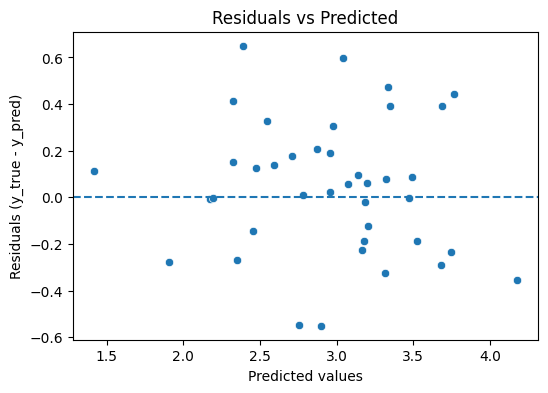

In [11]:
# 8) Residuals diagnostic
residuals = y_test - y_pred_test

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred_test, y=residuals)
plt.axhline(0, linestyle="--")
plt.xlabel("Predicted values")
plt.ylabel("Residuals (y_true - y_pred)")
plt.title("Residuals vs Predicted")
plt.show()

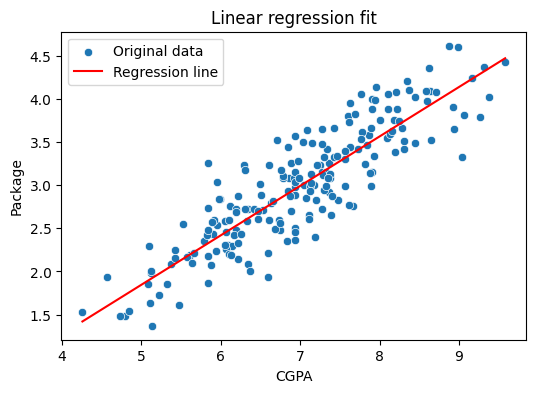

In [12]:
# 9) Regression line plot (original points + fitted line)
plt.figure(figsize=(6,4))
sns.scatterplot(x="cgpa", y="package", data=df, label="Original data")
# sort values for a clean line plot
order = np.argsort(df["cgpa"].values)
plt.plot(df["cgpa"].values[order], y_pred_all[order],c='red',label="Regression line")
plt.legend()
plt.xlabel("CGPA")
plt.ylabel("Package")
plt.title("Linear regression fit")
plt.show()


In [13]:
# 10) Safe single prediction (avoid warnings about feature names)
new_X = np.array([[6.89]])   # shape (1,1)
pred = lr.predict(new_X)
print(f"Predicted package for CGPA=6.89 -> {pred[0]:.4f}")

Predicted package for CGPA=6.89 -> 2.9296


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
